# L'oreal Analysis
## - Does the high review product really suitable for you?

In [647]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from warnings import filterwarnings 

## Products Data

In [648]:
# read in the product dataset
df = pd.read_csv('loreal.csv')

In [649]:
df.head()

,category,main_category,name,num_reviews,price,rating
0,Facial Moisturizer,Skin Care,Triple Power Anti-Aging Moisturizer,4654.0,$24.99,4.4
1,Face Mask,Skin Care,Multi-Mask Clay Tripod Kit,4.0,$9.99,5.0
2,Hair Treatments,Hair Care,Burst of Sweet Pear Tangle Tamer for All Hair ...,20.0,$3.49,4.0
3,Conditioner,Hair Care,Color Vibrancy Protecting Conditioner,90.0,$4.99,4.4
4,Shampoo,Hair Care,HydraCharge Shampoo,1588.0,$7.99,4.4


In [650]:
df.dtypes

category          object
main_category     object
name              object
num_reviews      float64
price             object
rating           float64
dtype: object

### Data Cleaning

In [651]:
# check missing values
np.sum(df.isnull())

category          0
main_category     0
name              0
num_reviews      11
price             0
rating           11
dtype: int64

In [652]:
# convert number of reviews to int type
# fill NAs with zero
df['num_reviews'] = df['num_reviews'].fillna(0).astype('int')
np.sum(df.isnull())

category          0
main_category     0
name              0
num_reviews       0
price             0
rating           11
dtype: int64

In [653]:
# remove rows with rating score missing
df.dropna(subset=['rating'], inplace=True)

In [654]:
np.sum(df.isnull())

category         0
main_category    0
name             0
num_reviews      0
price            0
rating           0
dtype: int64

In [655]:
# convert price to float type
df['price'] = df['price'].str[1:]
df['price'] = df['price'].astype('float64')

In [656]:
# change column names
df.columns = ['Category', 'Main_Category', 'Product_Name', 'NumofReviews', 'Price', 'RatingScore']

### Data Analysis

Text(0,0.5,'Density')

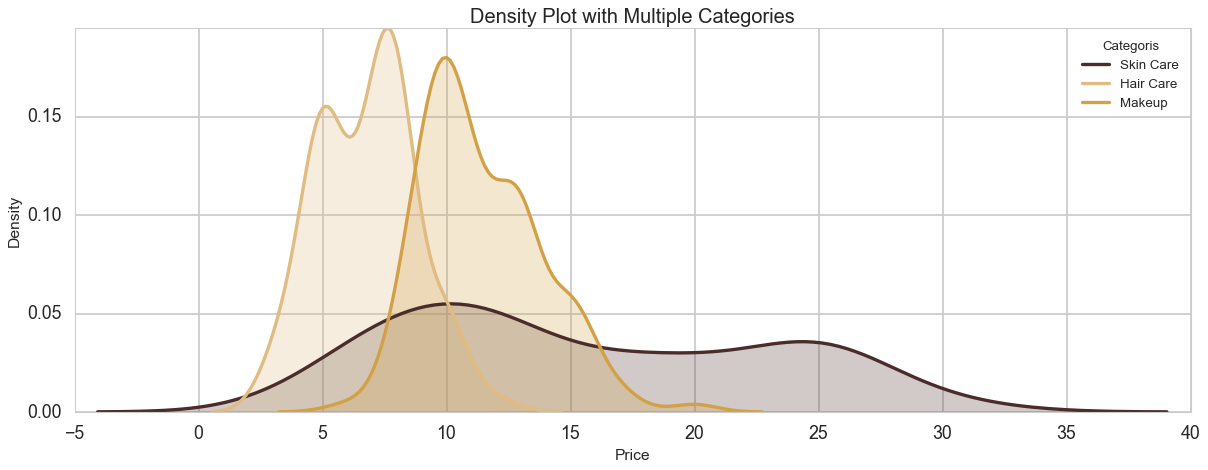

In [657]:
### Visualize the distribution of price ###

# List of three catogories to plot
categories = ['Skin Care', 'Hair Care', 'Makeup']
colors = ['#4a2c2a','#e0bb82','#d2a146']

# Iterate through the three catogories
for i in range(0, len(categories)):
    # Subset to the category
    subset = df[df['Main_Category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(subset['Price'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])
    
# sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
plt.legend(prop={'size': 12}, title = 'Categoris')
plt.title('Density Plot with Multiple Categories',fontdict = {'fontsize' : 18})
plt.xlabel('Price', fontdict = {'fontsize' : 14})
plt.ylabel('Density', fontdict = {'fontsize' : 14})

Text(0,0.5,'Density')

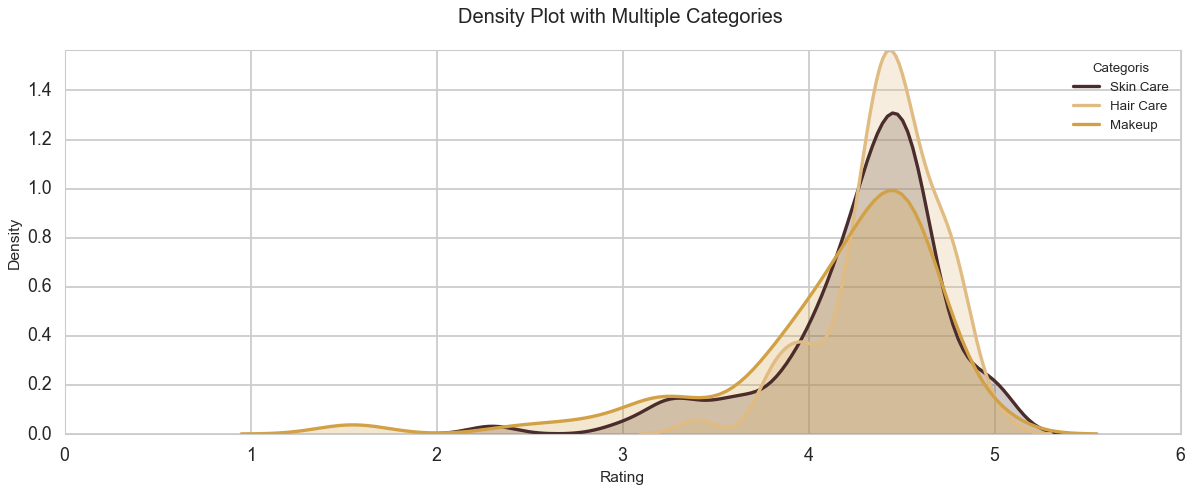

In [658]:
### Visualize the distribution of rating ###

# List of three catogories to plot
categories = ['Skin Care', 'Hair Care', 'Makeup']
colors = ['#4a2c2a','#e0bb82','#d2a146']

# Iterate through the three catogories
for i in range(0, len(categories)):
    # Subset to the category
    subset = df[df['Main_Category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(subset['RatingScore'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])

plt.style.use('seaborn-whitegrid')
plt.legend(prop={'size': 12}, title = 'Categoris')
plt.title('Density Plot with Multiple Categories \n', fontdict = {'fontsize' : 18})
plt.xlabel('Rating', fontdict = {'fontsize' : 14})
plt.ylabel('Density', fontdict = {'fontsize' : 14})

In [661]:
### The Top Products ###
top_products = df.sort_values('RatingScore', ascending = False).loc[df.NumofReviews > 1500]
top_products = top_products.groupby('Main_Category').head(3).sort_values('Main_Category')
top_products.style.hide_index()

Category,Main_Category,Product_Name,NumofReviews,Price,RatingScore
Conditioner,Hair Care,Extraordinary Oil Conditioner,2349,4.99,4.8
Shampoo,Hair Care,Extraordinary Oil Shampoo,3279,4.99,4.7
Hair Treatments,Hair Care,Extraordinary Oil-In-Cream,1601,6.99,4.7
Mascara,Makeup,Lash Primer,1699,8.95,4.5
Lipstick,Makeup,Matte Lip Stain,6787,11.99,4.4
Foundation Makeup,Makeup,Total Cover Foundation,1852,12.99,4.2
Facial Cleanser,Skin Care,Bright Reveal Brightening Daily Scrub Cleanser,2649,6.99,4.6
Face Mask,Skin Care,Exfoliate & Refining Face Mask,1993,12.99,4.6
Facial Moisturizer,Skin Care,1.5% Pure Hyaluronic Acid Serum,1722,29.99,4.5


## The Review Data
### Analyze one of the top products - lip stain

In [732]:
reviews = pd.read_csv('lipstain_reviews.csv')
reviews = reviews[['age', 'haircolor', 'undertone','eyecolor','rating', 'content','recommend']]

In [733]:
reviews.head()

,age,haircolor,undertone,eyecolor,rating,content,recommend
0,NaN,NaN,NaN,NaN,2 out of 5 stars.,I love this lipstick formula so I own multiple...,NaN
1,25 to 34,Dark Blonde,Warm Undertone,Dark Brown,1 out of 5 stars.,I was so excited to buy this product and when ...,No
2,25 to 34,Darkest Brown,Warm Undertone,Hazel,5 out of 5 stars.,My weird skin tone just doesnt seem to take we...,Yes
3,35 to 44,Medium Blonde,Warm Undertone,Blue,1 out of 5 stars.,I was so excited for this product... and then ...,No
4,35 to 44,Dark Blonde,Warm Undertone,Blue,1 out of 5 stars.,I was really excited to receive a free sample ...,No


In [734]:
### Data Cleaning ###

# drop NAs in target variable
reviews.dropna(subset=['rating'], inplace=True)
reviews['rating'] = reviews['rating'].str[0]
reviews['rating'] = reviews['rating'].astype('int')

### Age Group

In [735]:
### age ###
reviews_age = reviews[['age', 'rating']]
reviews_age = reviews_age.dropna()

# prepare data for plotting
# good reviews
high_reviews = reviews_age[reviews_age['rating'] >= 4].groupby('age').agg('count')
high_reviews.columns = ['freq']
high_reviews = high_reviews.reset_index()


# low reviews
low_reviews = reviews_age[reviews_age['rating'] <= 3].groupby('age').agg('count')
low_reviews.columns = ['freq']
low_reviews = low_review.reset_index()

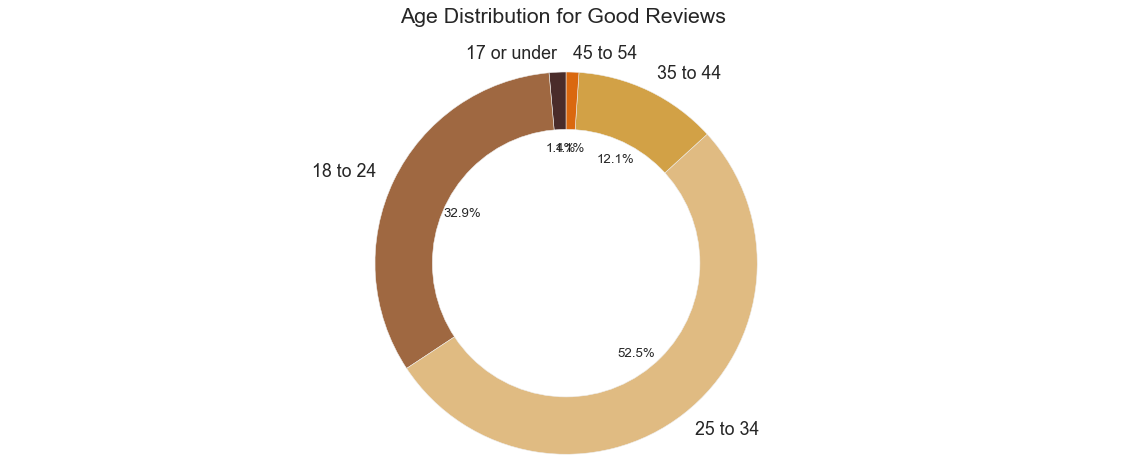

<Figure size 80x80 with 0 Axes>

In [737]:
# plotting high reviews (grouped by age)
color = ['#4a2c2a','#9f6841','#e0bb82','#d2a146','#da680f']
fig,ax = plt.subplots()
plt.title("Age Distribution for Good Reviews \n\n")
plt.pie(high_reviews['freq'], labels=high_reviews['age'], colors = color, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.figure(figsize=(1,1))

ax.axis('equal')
plt.show()

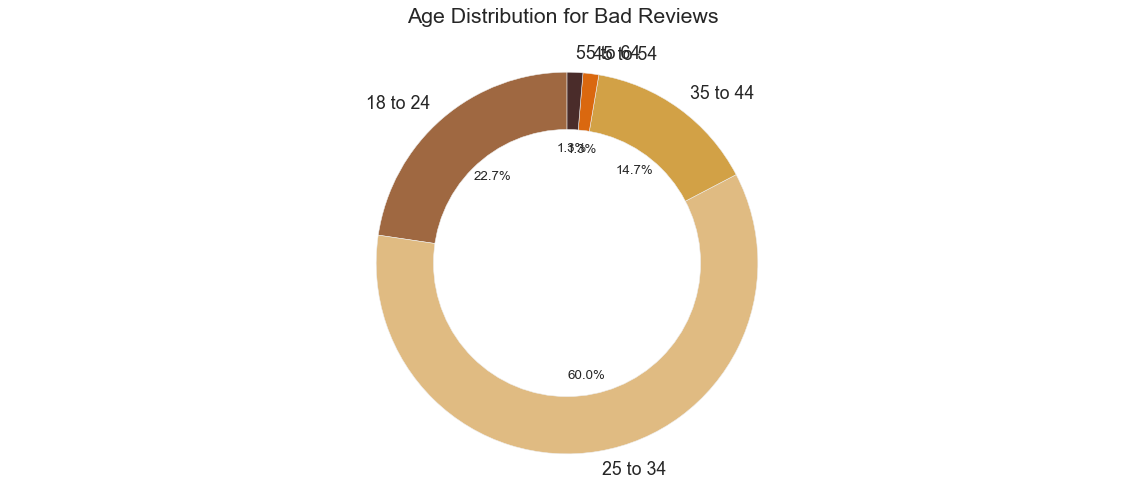

In [738]:
# plotting low reviews (grouped by age)
color = ['#9f6841','#e0bb82','#d2a146','#da680f','#4a2c2a']
fig,ax = plt.subplots()
plt.title("Age Distribution for Bad Reviews \n\n")
plt.pie(low_reviews['freq'], labels=low_reviews['age'], colors = color, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.show()

### Hair Color

In [739]:
### hair color ###
reviews_hair = reviews[['haircolor', 'rating']]
reviews_hair = reviews_hair.dropna()

# prepare data for plotting
# high reviews
high_reviews = reviews_hair[reviews_hair['rating'] >= 4].groupby('haircolor').agg('count')
high_reviews.columns = ['freq']
high_reviews = high_reviews.reset_index()
high_reviews['perc'] = high_reviews['freq']/high_reviews['freq'].sum()
high_reviews = high_reviews.sort_values('perc', ascending = False)
high_reviews['rating_type'] = 'Good Reviews'

# low reviews
low_reviews = reviews_hair[reviews_hair['rating'] <= 3].groupby('haircolor').agg('count')
low_reviews.columns = ['freq']
low_reviews = low_reviews.reset_index()
low_reviews['perc'] = low_reviews['freq']/low_reviews['freq'].sum()
low_reviews = low_reviews.sort_values('perc', ascending = False)
low_reviews['rating_type'] = 'Bad Reviews'

df_hair = high_reviews.append(low_reviews, ignore_index = True)

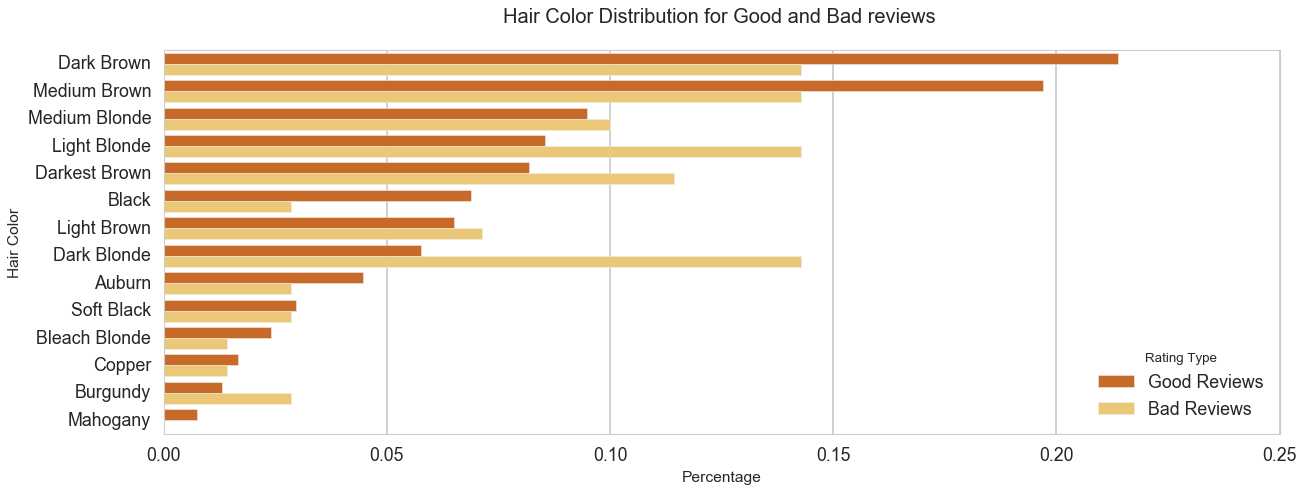

In [740]:
# bar plot
# comparing percentage change for each hair color in good/bad reviews
sns.barplot(x="perc", y="haircolor", hue="rating_type", palette = "YlOrBr_r", data=df_hair)
plt.title('Hair Color Distribution for Good and Bad reviews \n ', fontdict = {'fontsize' : 18})
plt.xlabel('Percentage', fontdict = {'fontsize' : 14})
plt.ylabel('Hair Color', fontdict = {'fontsize' : 14})
plt.legend(loc="lower right", title = "Rating Type", fontsize = 16)


### Undertone

In [741]:
### undertone ###
reviews_undertone = reviews[['undertone', 'rating']]
reviews_undertone = reviews_undertone.dropna()

# prepare data for plotting
# high reviews
high_reviews = reviews_undertone[reviews_undertone['rating'] >= 4].groupby('undertone').agg('count')
high_reviews.columns = ['freq']
high_reviews = high_reviews.reset_index()

# low reviews
low_reviews = reviews_undertone[reviews_undertone['rating'] <= 3].groupby('undertone').agg('count')
low_reviews.columns = ['freq']
low_reviews = low_reviews.reset_index()

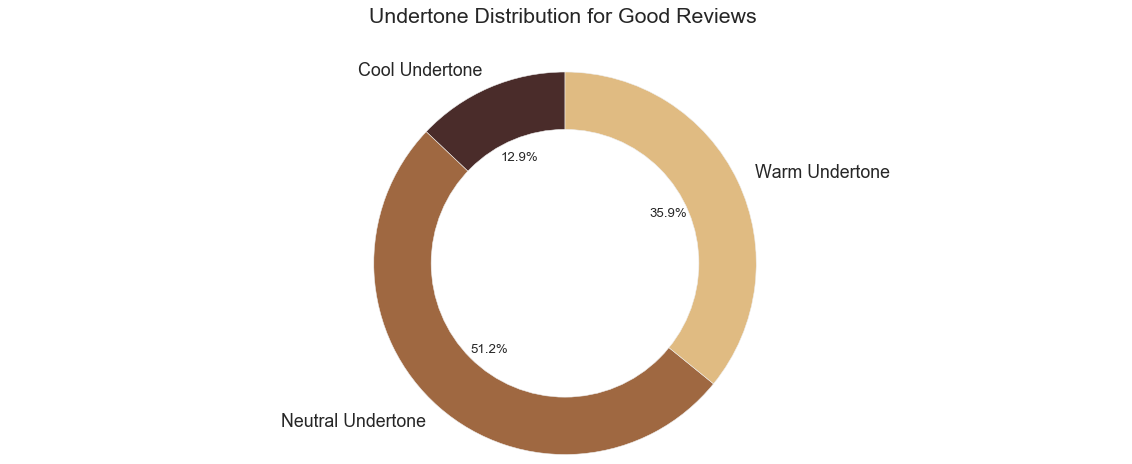

<Figure size 80x80 with 0 Axes>

In [742]:
# plotting high reviews (grouped by undertone)
color = ['#4a2c2a','#9f6841','#e0bb82','#d2a146','#da680f']
fig,ax = plt.subplots()
plt.title("Undertone Distribution for Good Reviews \n\n")
plt.pie(high_reviews['freq'], labels=high_reviews['undertone'], colors = color, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.figure(figsize=(1,1))

ax.axis('equal')
plt.show()

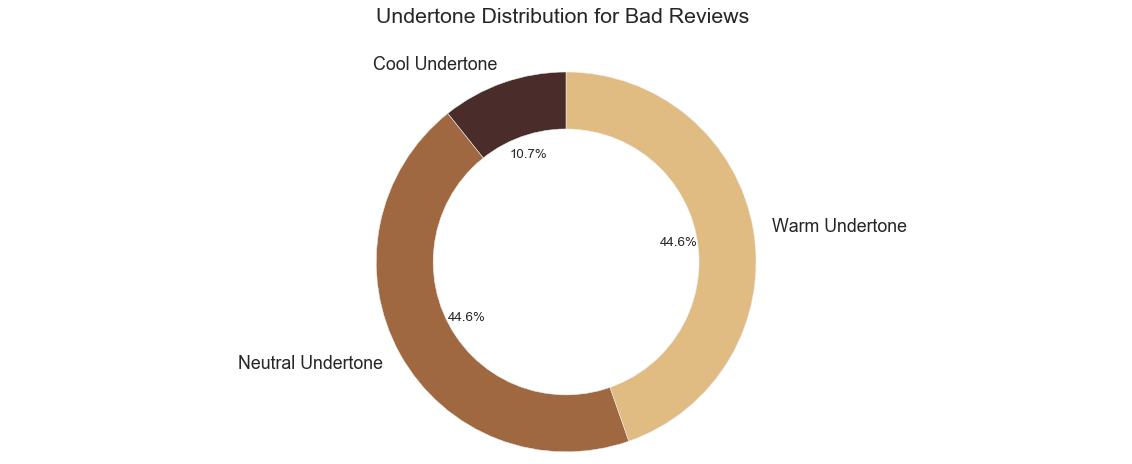

In [743]:
# plotting low reviews (grouped by undertone)
color = ['#4a2c2a','#9f6841','#e0bb82','#d2a146','#da680f']
fig,ax = plt.subplots()
plt.title("Undertone Distribution for Bad Reviews \n\n")
plt.pie(low_reviews['freq'], labels=low_reviews['undertone'], colors = color, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.show()

### Eye Color

In [744]:
### eyecolor ###
reviews_eye = reviews[['eyecolor', 'rating']]
reviews_eye = reviews_eye.dropna()

# prepare data for plotting
# high reviews
high_reviews = reviews_eye[reviews_eye['rating'] >= 4].groupby('eyecolor').agg('count')
high_reviews.columns = ['freq']
high_reviews = high_reviews.reset_index()
high_reviews['perc'] = high_reviews['freq']/high_reviews['freq'].sum()
high_reviews = high_reviews.sort_values('perc', ascending = False)
high_reviews['rating_type'] = 'Good Reviews'

# low reviews
low_reviews = reviews_eye[reviews_eye['rating'] <= 3].groupby('eyecolor').agg('count')
low_reviews.columns = ['freq']
low_reviews = low_reviews.reset_index()
low_reviews['perc'] = low_reviews['freq']/low_reviews['freq'].sum()
low_reviews = low_reviews.sort_values('perc', ascending = False)
low_reviews['rating_type'] = 'Bad Reviews'

df_eye = high_reviews.append(low_reviews, ignore_index=True)

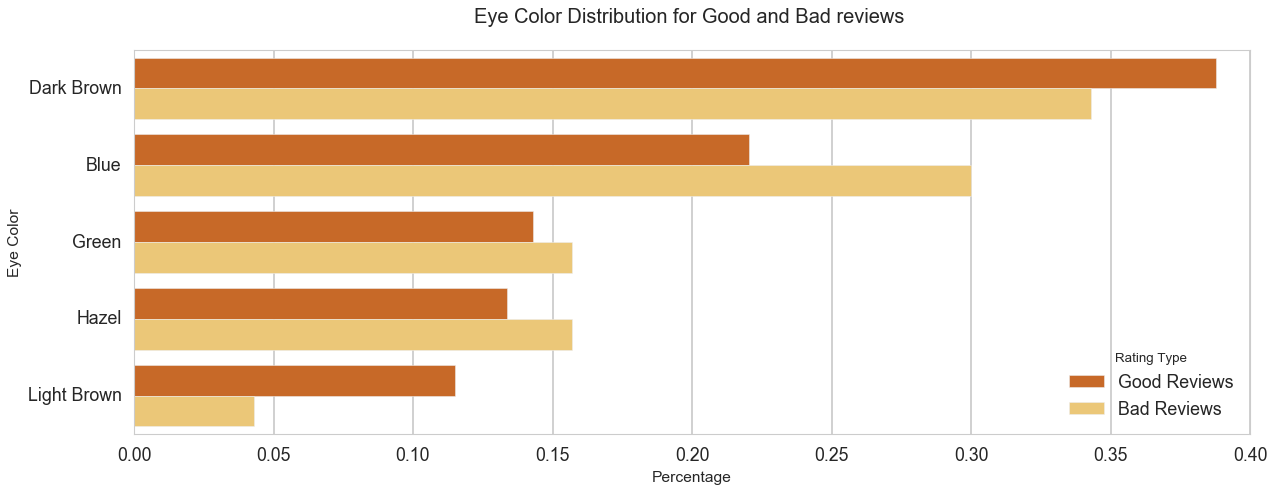

In [745]:
# bar plot
# comparing percentage change for each eye color in good/bad reviews
sns.barplot(x="perc", y="eyecolor", hue="rating_type", palette = "YlOrBr_r", data=df_eye)
plt.title('Eye Color Distribution for Good and Bad reviews \n ', fontdict = {'fontsize' : 18})
plt.xlabel('Percentage', fontdict = {'fontsize' : 14})
plt.ylabel('Eye Color', fontdict = {'fontsize' : 14})
plt.legend(loc="lower right", title = "Rating Type", fontsize = 16)

### Word Cloud

In [746]:
### Word Cloud for all reviews ###
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(['lipstick', 'color','colors','lips','lipsticks', 'lip', 'product', 'liquid', 'matte', 'feel', 'shade', 'love', 'look', "n't", 'really', 'applicator', 'wear', 'formula'])

In [747]:
reviews_content = reviews[['content']]
reviews_content = reviews_content.dropna()
text = ' '.join(reviews_content['content'])

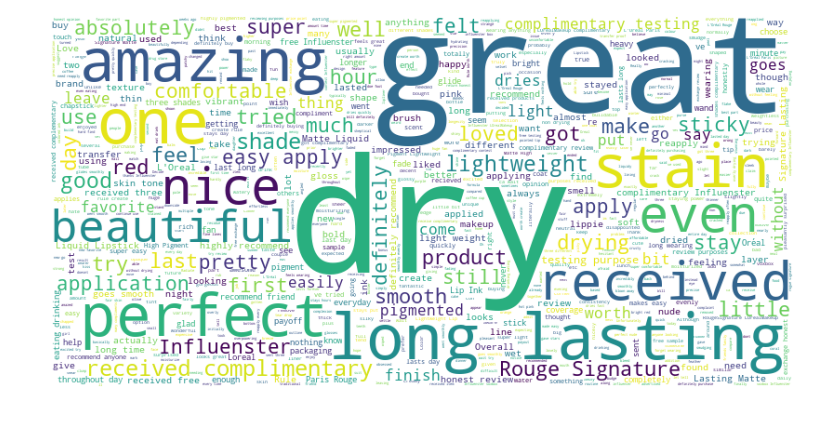

In [748]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(" ".join([word for word in word_tokenize(text) if word not in stop]))

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off")
plt.show()